Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content
/content/gdrive/MyDrive/Colab Notebooks/Archivos
 CNN_Model.png		      Raisin_Dataset.xlsx
 Dataset		     'Summary of Weather.csv'
 FastFoodNutritionMenu.csv    titanic.csv
 FastFoodNutritionMenu.xlsx   wine.data
 iris.data		     'winequality-red (1).csv'
 model.h5		      WPP2022_DeathsBySingleAgeSex_Medium_1950-2021.csv


<ipython-input-1-c6a9bf5112f4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[column] = pd.to_numeric(df_temp[column], errors='coerce')


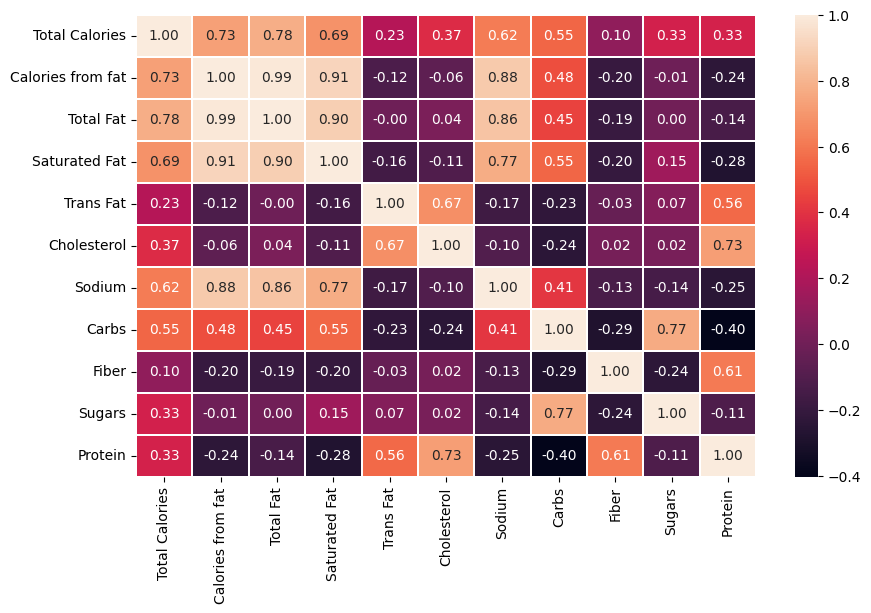

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import scipy.stats as stats
from google.colab import drive

drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive/Colab Notebooks/Archivos"
!ls


columns = ["Company","Item","Total Calories","Calories from fat","Total Fat","Saturated Fat","Trans Fat","Cholesterol","Sodium","Carbs","Fiber","Sugars","Protein","Weight"]

# Leer el archivo CSV
df = pd.read_csv('FastFoodNutritionMenu.csv', names=columns)

# Convertir todas las columnas relevantes a tipo numérico
df_temp = df[["Total Calories","Calories from fat","Total Fat","Saturated Fat","Trans Fat","Cholesterol","Sodium","Carbs","Fiber","Sugars","Protein"]]
for column in df_temp.columns:
    df_temp[column] = pd.to_numeric(df_temp[column], errors='coerce')
# Eliminar filas con valores nulos en las columnas relevantes
df_temp = df_temp.dropna()

# Calcular la matriz de correlación
corr_matrix = df_temp.corr()

# Crear y mostrar el mapa de calor
plt.figure(figsize=(10, 6))
sn.heatmap(corr_matrix, annot=True, linewidths=0.3, fmt='0.2f')
plt.show()


In [2]:
# Elimina las filas con valores faltantes en las columnas seleccionadas

df['Calories from fat'] = pd.to_numeric(df['Calories from fat'], errors='coerce')
df['Total Fat'] = pd.to_numeric(df['Total Fat'], errors='coerce')
df['Saturated Fat'] = pd.to_numeric(df['Saturated Fat'], errors='coerce')
df = df.dropna(subset=['Calories from fat', 'Total Fat', 'Saturated Fat'])

#df = df.loc[abs(df['Calories from fat']) > 0]
#df = df.loc[abs(df['Total Fat']) > 0]
#df = df.loc[abs(df['Saturated Fat']) > 0]

In [3]:
"""
 Asignacion de la variable dependiente e independiente
 Para este modelo la columna "Calories from fat" es la dependiente
 Las variables independientes serán grasas totales (Total fat)
 y grasas saturadas (Saturated fat)
"""
Y = df['Calories from fat']
X = df[['Total Fat', 'Saturated Fat', 'Sodium']]


# Dividimos los datos en 80% para entrenar el modelo y 20% para el testeo del modelo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
model = LinearRegression(fit_intercept=True)

In [4]:
# Entrenamiento del modelo
model.fit(X_train, Y_train)
coefficients = model.coef_
print("Coeficiente para Total Fat:", coefficients[0])
print("Coeficiente para Saturated Fat:", coefficients[1])
print("Coeficiente para Sodium:", coefficients[2])
print ("Intersección: ", model.intercept_)

# Predicciones del modelo con los datos de entrenamiento (train)
Y_predict_train = model.predict(X_train)
# Mean Square Error de la fase de entrenamiento
# de los datos que predice el modelo contra los datos reales
print ("MSE de train: ", mean_squared_error(Y_train, Y_predict_train ))
#MAE
print ("MAE de train: ", mean_absolute_error(Y_train, Y_predict_train ))
# Precisión del modelo en la fase de entrenamiento
print ("R-squared de train: ", r2_score(Y_train, Y_predict_train ))

# Predicciones del modelo con los datos de prueba (test)
Y_predict_test= model.predict(X_test)
# Mean Square Error de la fase de prueba
# de los datos que predice el modelo contra los datos reales
print ("MSE de test: ", mean_squared_error(Y_test, Y_predict_test))
#MAE
print ("MAE de test: ", mean_absolute_error(Y_test, Y_predict_test ))
# Precisión del modelo
print ("R-squared de test: ", r2_score(Y_test, Y_predict_test))

# Cross Validation del modelo
Cross_val = abs(cross_val_score(LinearRegression(), X_train, Y_train, cv=5, scoring = "r2").mean())
print ("Cross validation: ", Cross_val)

Coeficiente para Total Fat: 6.3155152608063645
Coeficiente para Saturated Fat: 4.325720273595063
Coeficiente para Sodium: 0.03755888344001779
Intersección:  -6.61752632026861
MSE de train:  256.07597156263876
MAE de train:  9.641375143929539
R-squared de train:  0.9812343884445058
MSE de test:  224.54350493803017
MAE de test:  9.532209155343352
R-squared de test:  0.979054752092691
Cross validation:  0.9805553802895008


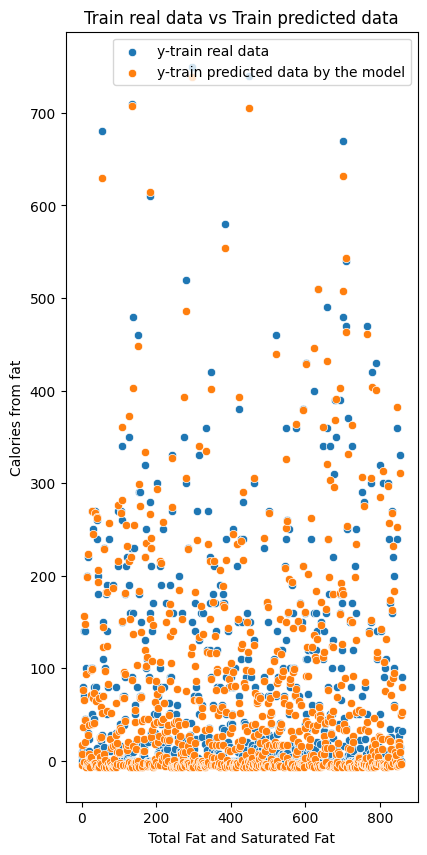

In [5]:
plt.figure(figsize=(10, 10))

# Create the first subplot
plt.subplot(1, 2, 1)

# Use Seaborn to create scatter plots
sn.scatterplot(x=range(len(Y_train)), y=Y_train, label='y-train real data')
sn.scatterplot(x=range(len(Y_train)), y=Y_predict_train, label='y-train predicted data by the model')

plt.ylabel("Calories from fat")
plt.xlabel("Total Fat and Saturated Fat")
plt.legend()
plt.title("Train real data vs Train predicted data")
plt.show()

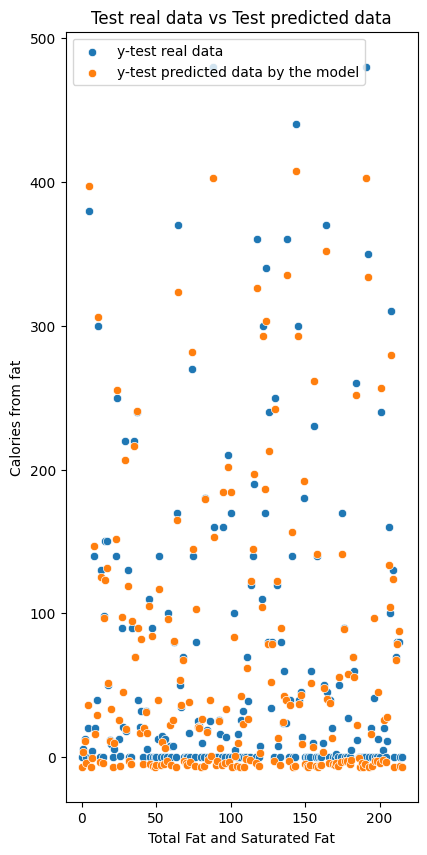

In [6]:
plt.figure(figsize=(10, 10))

# Create the first subplot
plt.subplot(1, 2, 1)

# Use Seaborn to create scatter plots
sn.scatterplot(x=range(len(Y_test)), y=Y_test, label='y-test real data')
sn.scatterplot(x=range(len(Y_test)), y=Y_predict_test, label='y-test predicted data by the model')

plt.ylabel("Calories from fat")
plt.xlabel("Total Fat and Saturated Fat")
plt.legend()
plt.title("Test real data vs Test predicted data")

plt.show()

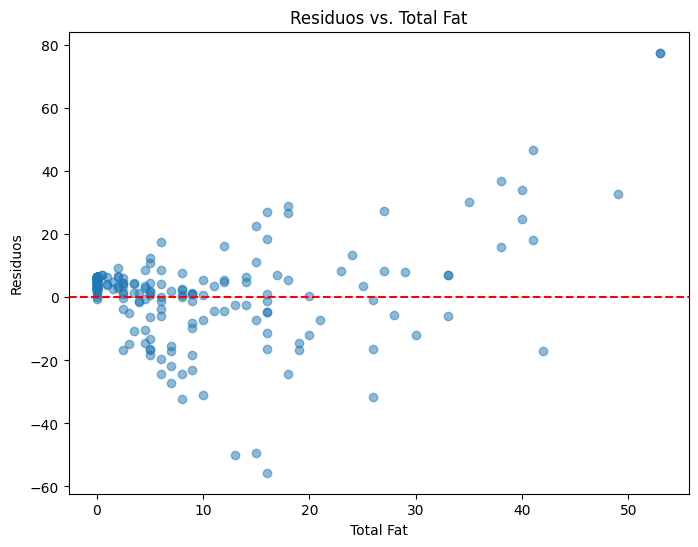

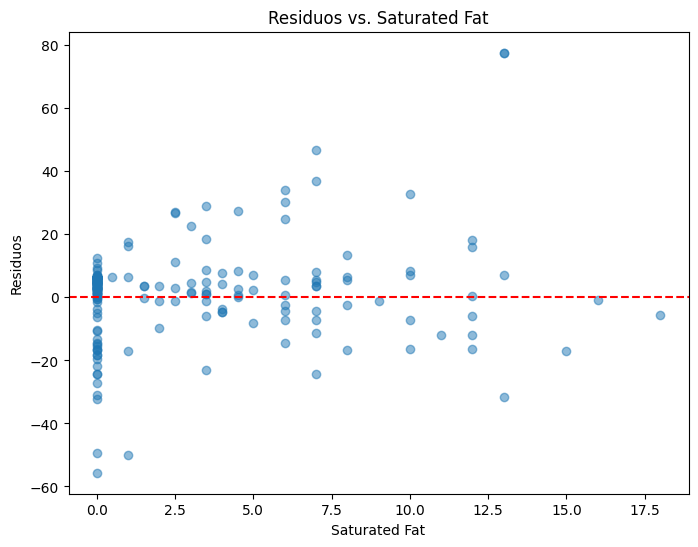

In [7]:
df['residuals'] = Y_test - Y_predict_test

predictor_variables = ['Total Fat', 'Saturated Fat']
for predictor in predictor_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[predictor], df['residuals'], alpha=0.5)
    plt.xlabel(predictor)
    plt.ylabel('Residuos')
    plt.title(f'Residuos vs. {predictor}')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

In [8]:

# Crea un modelo de Ridge con un valor de alpha (parámetro de regularización)
lasso_model = Lasso(alpha=10.0)

# Ajusta el modelo
lasso_model.fit(X_train, Y_train)

# Realiza predicciones y evalúa el modelo
Y_predict_trainL = lasso_model.predict(X_train)

print ("MSE de train lasso: ", mean_squared_error(Y_train, Y_predict_trainL))
#MAE
print ("MAE de train lasso: ", mean_absolute_error(Y_train, Y_predict_trainL))
# Precisión del modelo
print ("R-squared de train lasso: ", r2_score(Y_train, Y_predict_trainL))

Y_predict_testL= lasso_model.predict(X_test)
# Mean Square Error de la fase de prueba
# de los datos que predice el modelo contra los datos reales
print ("MSE de test lasso: ", mean_squared_error(Y_test, Y_predict_testL))
#MAE
print ("MAE de test lasso: ", mean_absolute_error(Y_test, Y_predict_testL))
# Precisión del modelo
print ("R-squared de test lasso: ", r2_score(Y_test, Y_predict_testL))

# Cross Validation del modelo
Cross_val = abs(cross_val_score(Lasso(), X_train, Y_train, cv=5, scoring = "r2").mean())
print ("Cross validation lasso: ", Cross_val)

MSE de train lasso:  268.10115665322377
MAE de train lasso:  9.901322461997028
R-squared de train lasso:  0.9803531657709539
MSE de test lasso:  226.2342310953585
MAE de test lasso:  9.568753514243614
R-squared de test lasso:  0.9788970424385267
Cross validation lasso:  0.9805269969491178


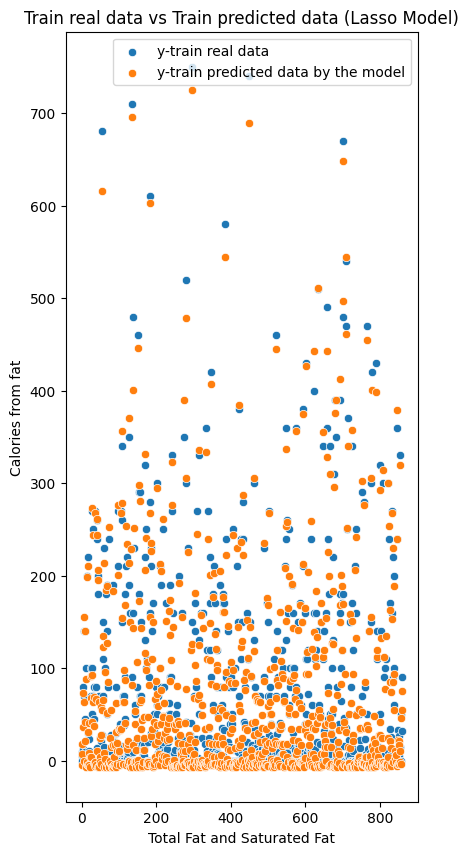

In [9]:
plt.figure(figsize=(10, 10))

# Create the first subplot
plt.subplot(1, 2, 1)

# Use Seaborn to create scatter plots
sn.scatterplot(x=range(len(Y_train)), y=Y_train, label='y-train real data')
sn.scatterplot(x=range(len(Y_train)), y=Y_predict_trainL, label='y-train predicted data by the model')

plt.ylabel("Calories from fat")
plt.xlabel("Total Fat and Saturated Fat")
plt.legend()
plt.title("Train real data vs Train predicted data (Lasso Model)")
plt.show()

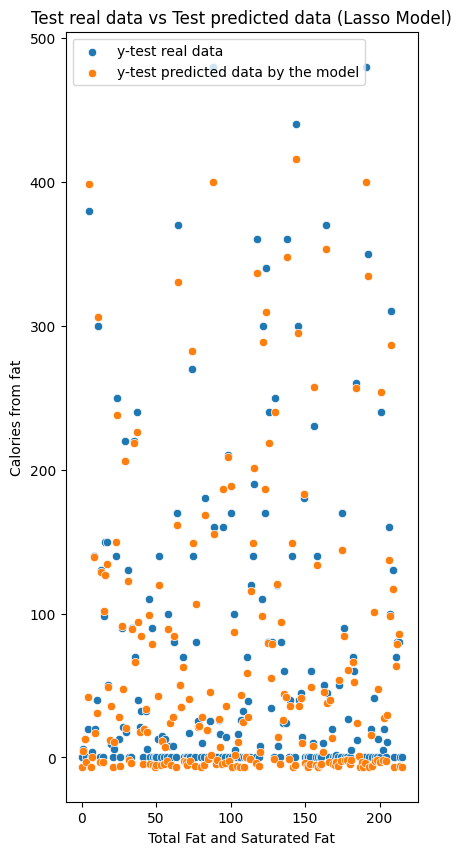

In [10]:
plt.figure(figsize=(10, 10))

# Create the first subplot
plt.subplot(1, 2, 1)

# Use Seaborn to create scatter plots
sn.scatterplot(x=range(len(Y_test)), y=Y_test, label='y-test real data')
sn.scatterplot(x=range(len(Y_test)), y=Y_predict_testL, label='y-test predicted data by the model')

plt.ylabel("Calories from fat")
plt.xlabel("Total Fat and Saturated Fat")
plt.legend()
plt.title("Test real data vs Test predicted data (Lasso Model)")

plt.show()

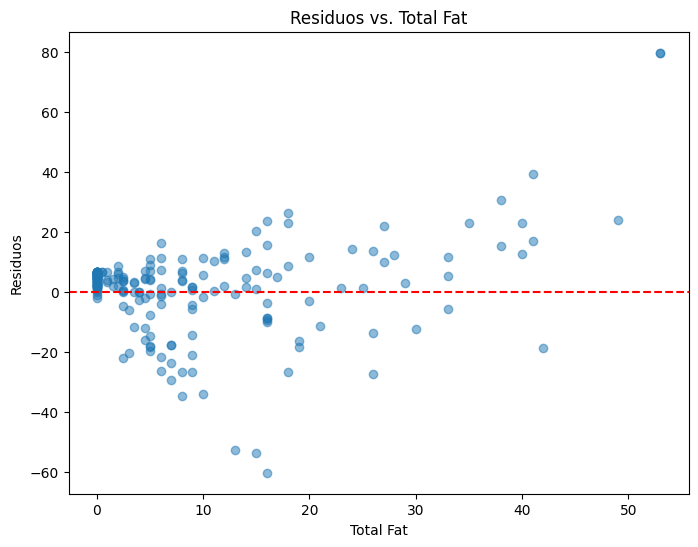

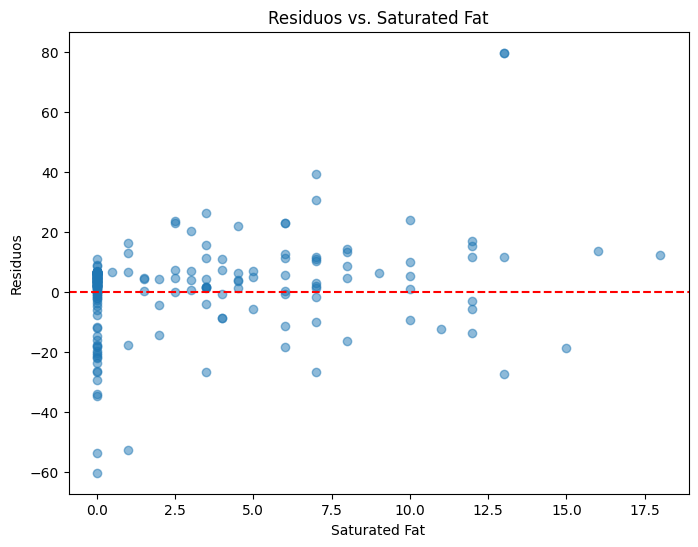

In [11]:
df['residuals2'] = Y_test - Y_predict_testL

predictor_variables = ['Total Fat', 'Saturated Fat']
for predictor in predictor_variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[predictor], df['residuals2'], alpha=0.5)
    plt.xlabel(predictor)
    plt.ylabel('Residuos')
    plt.title(f'Residuos vs. {predictor}')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()